In [135]:
import pandas as pd

In [136]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [137]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [138]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [139]:
data.shape

(200, 5)

In [140]:
print("Number of rows:",data.shape[0])
print("Number of colomns:",data.shape[1])

Number of rows: 200
Number of colomns: 5


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [142]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [143]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [144]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [145]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [146]:
X

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [147]:
from sklearn.cluster import KMeans

In [148]:
k_means = KMeans(n_clusters=5, n_init=10)
k_means.fit(X)

KMeans(n_clusters=5, n_init=10)

In [149]:
k_means = KMeans()
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 1,
       5, 4, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       1, 0, 7, 0, 7, 0, 7, 0, 7, 0, 1, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6], dtype=int32)

# **Elbow method to find optimal number of cluters.**
  WCSS - within cluters sum of squares martix, into pthon list

In [150]:
wcss=[]
for i in range(1, 11):
  k_means = KMeans(n_clusters=i, n_init=10)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

In [151]:
wcss

[308812.78,
 212840.1698209719,
 143342.75157170603,
 104374.15985112858,
 75350.77917248776,
 58300.44332159069,
 51096.62442155546,
 44346.912788790156,
 40573.697664978696,
 37389.10556500971]

In [152]:
import matplotlib.pyplot as plt

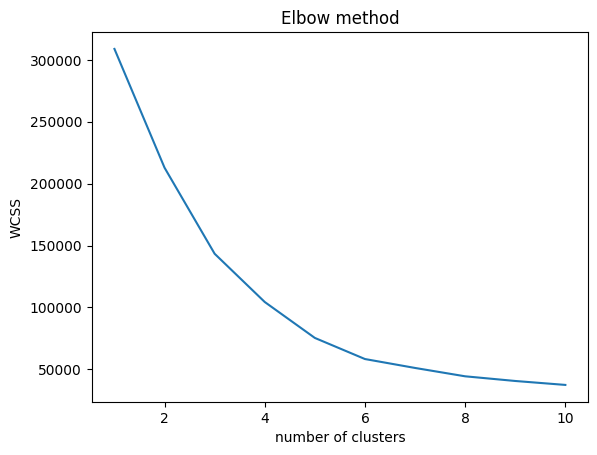

In [153]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

# MODEL TRAINING

In [154]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [155]:
X

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [156]:
KMeans(n_clusters = 5, random_state=42)
y_means = k_means.fit_predict(X)

In [157]:
y_means

array([9, 0, 4, 0, 9, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 9, 0, 9, 0, 9, 0,
       4, 0, 4, 0, 9, 0, 9, 0, 4, 0, 4, 0, 4, 0, 4, 0, 9, 0, 8, 0, 9, 6,
       9, 0, 8, 6, 9, 9, 8, 6, 6, 8, 8, 9, 8, 8, 6, 8, 8, 6, 8, 8, 8, 6,
       3, 8, 6, 6, 8, 3, 8, 8, 8, 6, 3, 3, 6, 3, 8, 6, 8, 3, 6, 3, 8, 6,
       6, 3, 8, 6, 3, 3, 6, 6, 3, 6, 3, 6, 6, 3, 8, 6, 3, 6, 8, 3, 8, 8,
       8, 6, 3, 6, 6, 6, 8, 3, 3, 3, 6, 3, 3, 2, 6, 2, 3, 2, 1, 2, 1, 2,
       6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 7, 5, 7, 5, 7,
       5, 7], dtype=int32)

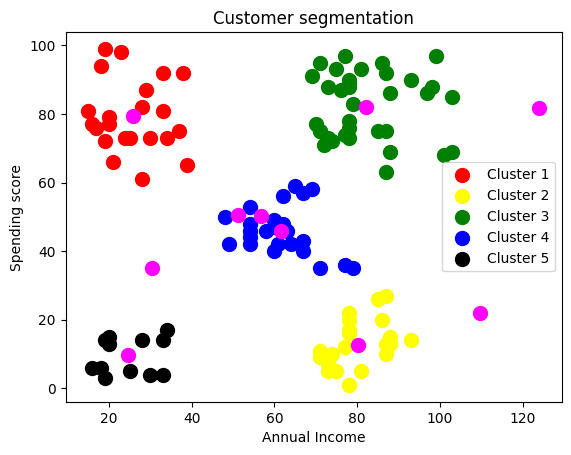

In [158]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1], s=100, c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1], s=100, c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1], s=100, c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1], s=100, c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1], s=100, c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=100, c='magenta')
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("Customer segmentation")
plt.legend()
plt.show()

In [159]:
# ax.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],X.iloc[y_means==0,2], s=100, c='red',label="Cluster 1")
# ax.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],X.iloc[y_means==1,2], s=100, c='yellow',label="Cluster 2")
# ax.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],X.iloc[y_means==2,2], s=100, c='green',label="Cluster 3")
# ax.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],X.iloc[y_means==3,2], s=100, c='blue',label="Cluster 4")
# ax.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],X.iloc[y_means==4,2], s=100, c='black',label="Cluster 5")
# ax.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],k_means.cluster_centers_[:,2], s=100, c='magenta')
# ax.set_xlabel("Annual Income")
# ax.set_ylabel("Spending score")
# ax.set_zlabel("age")
# plt.title("Customer segmentation")
# plt.legend()
# plt.show()

In [160]:
k_means.predict([[15, 39, 21]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([9], dtype=int32)

In [161]:
import joblib

In [162]:
joblib.dump(k_means,"Customer_segmentation")

['Customer_segmentation']

In [163]:
model = joblib.load("Customer_segmentation")

In [164]:
model.predict([[15,39,21]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([9], dtype=int32)